In [9]:
data = read.csv('./heat.csv',row.names = 1,check.names = F)

In [54]:
dim(data)

[1] 665  35

In [10]:
head(data,2)

,kegg,pathwayname,Metabolites,KO-CLP1,KO-CLP2,KO-CLP3,KO-CLP4,KO-CLP5,KO-CLP6,KO-CLP7,⋯,WT-CLP7,WT-CLP8,WT-NC1,WT-NC2,WT-NC3,WT-NC4,WT-NC5,WT-NC6,WT-NC7,WT-NC8
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,C00016,Vitamin digestion and absorption,FAD,48468.35,63872.39,24233.33,50405.59,65613.46,52507.49,70502.77,⋯,43014.26,45924.57,52259.21,50191.05,43677.84,41603.68,45101.81,34957.89,37741.19,50691.60
3,C00020,mTOR signaling pathway,Adenosine monophosphate,27998.52,38348.67,16087.01,15269.83,29201.37,16026.64,22482.76,⋯,18903.96,18091.83,33150.20,44166.00,39488.26,14876.48,35349.70,23671.59,35615.09,30056.85


In [30]:
anchor = data[,3:35]

In [31]:
library(tibble)

In [32]:
anchor = as.tibble(anchor)

In [33]:
anchor = tibble::column_to_rownames(anchor,'Metabolites')

In [34]:
anchor_t =t(anchor)

In [35]:
data_t = data.frame(anchor_t)

In [37]:
group=  data.frame(
  group = c(rep('KO_CLP',8),
            rep('KO_NC',8),
           rep('WT_CLP',8),          
           rep('WT_NC',8)
          )
)

In [40]:
data_t2 = cbind(group,data_t)

In [42]:
dim(data_t2)

[1]  32 666

In [44]:
data_t2[,2:666] = as.data.frame(lapply(data_t2[,2:666],as.numeric))

In [48]:
count = aggregate(data_t2[,2:666],list(data_t2[,1]),mean)

In [57]:
head(count_t,5)

,KO_CLP,KO_NC,WT_CLP,WT_NC
,<dbl>,<dbl>,<dbl>,<dbl>
FAD,52230.0428,50421.8356,48722.7533,44528.0351
Adenosine monophosphate,22707.9024,32650.5488,22957.8926,32046.7708
S-Adenosylhomocysteine,822.7914,911.2633,797.4356,855.5679
Pyruvic acid,406.9613,216.6431,343.7843,342.9615
L-Glutamic acid,1647032.9969,1877070.2575,1700331.6184,1746545.2950


In [51]:
count = tibble::column_to_rownames(count,'Group.1')

In [52]:
count_t = as.data.frame(t(count))

In [55]:
dim(count_t)

[1] 665   4

In [56]:
rownames(count_t)  = data$Metabolites

In [58]:
metebolite = rownames_to_column(count_t,'Metabolites')

In [59]:
cnumber = read.csv('/data/workdirV6/cnumber.csv')

In [60]:
count = dplyr::left_join(cnumber,metebolite)

Joining with `by = join_by(Metabolites)`


In [62]:
count = na.omit(count)

In [63]:
dim(count)

[1] 665   6

In [87]:
pathway = read.csv('/data/workdirV6/KEGG_COMPOUND_PATHWAY_mmu.csv')

In [65]:
pathway = pathway[,c('PATHWAY_MAP','COMPOUND')]

colnames(pathway) = c('pathwayname','kegg')

pathway = pathway[,c(2,1)]

diffcount = count[,c(2,1,3:6)]

head(diffcount,2)

heat = merge(pathway,diffcount,by = 'kegg')

dim(pathway)



heat = unique(heat)

heat <- heat[!duplicated(heat$kegg), ]

zhu = data.frame(table(heat$pathwayname))
zhu$ID <- as.numeric(rownames(zhu))



,kegg,Metabolites,KO_CLP,KO_NC,WT_CLP,WT_NC
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,C20522,Imidazolepropionic acid,755859.751,797446.813,808214.513,909203.677
4,C20361,Pseudooxynicotine,5643.125,4772.476,5411.856,4432.595


[1] 6244    2

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 665   7

,kegg,pathwayname,Metabolites,KO_CLP,KO_NC,WT_CLP,WT_NC
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,C00016,Vitamin digestion and absorption,FAD,52230.04,50421.84,48722.75,44528.04
3,C00020,mTOR signaling pathway,Adenosine monophosphate,22707.90,32650.55,22957.89,32046.77


Warning message:
“package ‘matrixStats’ was built under R version 4.2.3”

Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count




ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [1] not equal to array extent


In [66]:
head(heat,2)

,kegg,pathwayname,Metabolites,KO_CLP,KO_NC,WT_CLP,WT_NC
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,C00016,Vitamin digestion and absorption,FAD,52230.04,50421.84,48722.75,44528.04
3,C00020,mTOR signaling pathway,Adenosine monophosphate,22707.90,32650.55,22957.89,32046.77


In [71]:
library(dplyr)

# heat1 = heat %>% filter(pathwayname	 %in% c('Fatty acid biosynthesis'))

heat2=heat[which(rowSums(heat[,4:7]) > 0),]

In [72]:

dim(heat2)

head(heat2,2)

[1] 665   7

,kegg,pathwayname,Metabolites,KO_CLP,KO_NC,WT_CLP,WT_NC
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,C00016,Vitamin digestion and absorption,FAD,52230.04,50421.84,48722.75,44528.04
3,C00020,mTOR signaling pathway,Adenosine monophosphate,22707.90,32650.55,22957.89,32046.77


In [ ]:
Fatty acid biosynthesis
Fatty acid elongation
Fatty acid degradation
Steroid biosynthesis
Primary bile acid biosynthesis
Steroid hormone biosynthesis
Glycerolipid metabolism
Glycerophospholipid metabolism
Ether lipid metabolism
Sphingolipid metabolism
Arachidonic acid metabolism
Linoleic acid metabolism
alpha-Linolenic acid metabolism
Biosynthesis of unsaturated fatty acids


In [89]:
heat1 = heat2 %>% filter(pathwayname	 %in% c('Biosynthesis of unsaturated fatty acids',
                                               # 'alpha-Linolenic acid metabolism',
                                               'Fatty acid biosynthesis',
                                               'Linoleic acid metabolism',
                                               'Arachidonic acid metabolism'))

In [90]:
dim(heat1)

[1] 65  7

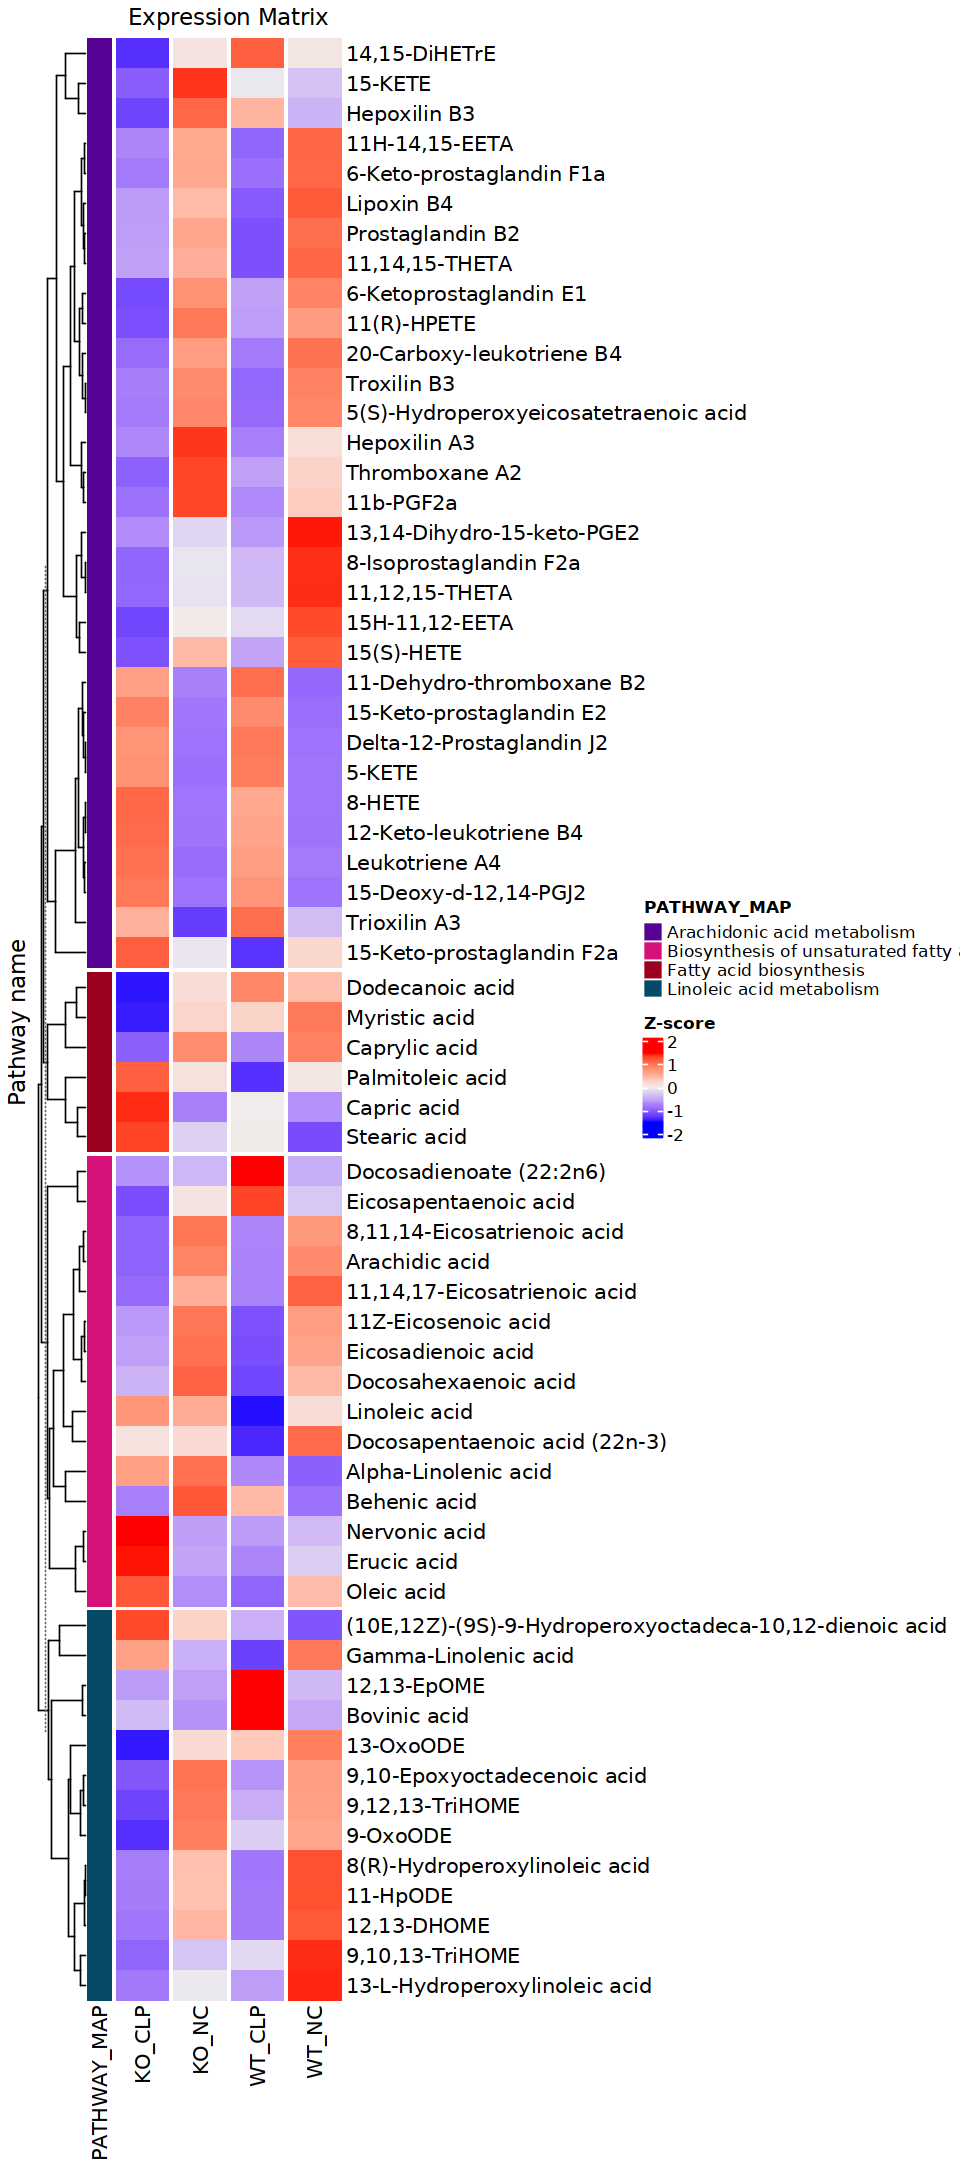

In [92]:
matrix = as.matrix(heat1[1:65,4:7])
library(matrixStats)
matrix = (matrix - rowMeans(matrix))/rowSds(matrix)
rownames(matrix) <- heat1$Metabolites
sample_annotation <- data.frame(
  Type = c(rep('KO_CLP',1),
            rep('KO_NC',1),
           rep('WT_CLP',1),          
           rep('WT_NC',1)
          )
)

rownames(sample_annotation) <- colnames(matrix)

gene_annotation <- data.frame(
  PATHWAY_MAP = heat1$pathwayname
)

gene_annotation$GeneType = gsub(' ','_',gene_annotation$PATHWAY_MAP)

rownames(gene_annotation) <- rownames(matrix)

# row_colors <- list(
#   PathwayName = c(Amino_acid_metabolism = "#FFC0CB", Carbohydrate_metabolism = "#FFB6C9", Lipid_metabolism = "#FF69B4",
#           Metabolism_of_cofactors_and_vitamins = "#1B9E77", Membrane_transport = "#D95F02", Nervous_system = "#7570b3")
# )

# col_colors <- list(
#   Group = c(KO_CLP= "#add8e6", WT_CLP = "#87CEFA", KO_NC = "#4682B4",WT_NC = '#FF69B4')
# )

library(ComplexHeatmap)

ha_col = HeatmapAnnotation(df = sample_annotation)
ha_row = rowAnnotation(PATHWAY_MAP = gene_annotation$PATHWAY_MAP)



p = Heatmap(matrix, # 表达矩阵a
       # top_annotation = ha_col, # 列注释对象
        left_annotation = ha_row,
        
 # 行注释对象
        cluster_rows = TRUE, 
      cluster_columns = FALSE,
        show_row_names = TRUE,
      show_column_names = TRUE,
        column_split = sample_annotation$Type, # 按样本类型分组
        row_split = gene_annotation$PATHWAY_MAP,   # 按基因类型分组
        column_title = "Expression Matrix",
        row_title = "Pathway name ",
            heatmap_legend_param = list(title = 'Z-score'), 
    use_raster = NULL, raster_device = c("png", "jpeg", "tiff", 
        "CairoPNG", "CairoJPEG", "CairoTIFF", "agg_png"), raster_quality = 1
        )

p

In [80]:
options(repr.plot.height = 18,repr.plot.width = 8)

In [94]:
pdf('heatmap-aim.pdf',height = 14,width = 8)
print(p)
dev.off()

png 
  2